In [93]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz
from scipy import signal

font = {'family':'serif', 'weight':'normal', 'size':16}
fontTitle = {'family':'serif', 'weight':'normal', 'size':20}

# Problem 5.1

Para o sinal $s(t)$, tem-se que sua densidade espectral de potência é: 
$$S_x(f) = \frac{P_0}{1+(f/B)^2}$$
Para calcular a SNR na presença de um ruído $n(t)$ com densidade espectral de potência igual a $N_0/2$ em todas as frequências, realizamos a integral de ambas as curvas de densidade espectral dentro da banda do filtro $W$, logo:
$$SNR = \frac{P_{sinal}}{P_{ruido}}$$
Onde:
$$P_{sinal} = \int^{W/2}_{-W/2}\frac{P_0}{1+(f/B)^2}~df~~~=~~P_0B[arctan(W/2B)-arctan(-W/2B)]$$
$$P_{sinal} = 2P_0B~arctan\left(\frac{1}{2}\frac{W}{B}\right)$$
$$P_{ruido} = \int^{W/2}_{-W/2}\frac{N_0}{2}~df~~=~~ \frac{W~N_0}{2}$$ 
assim:
$$SNR = \frac{4P_0B~arctan\left(\frac{1}{2}\frac{W}{B}\right)}{W~N_0} $$
nomeando $u = \frac{W}{B}$, tem-se que:
$$SNR(u) = \frac{4P_0~arctan\left(\frac{u}{2}\right)}{u~N_0}$$

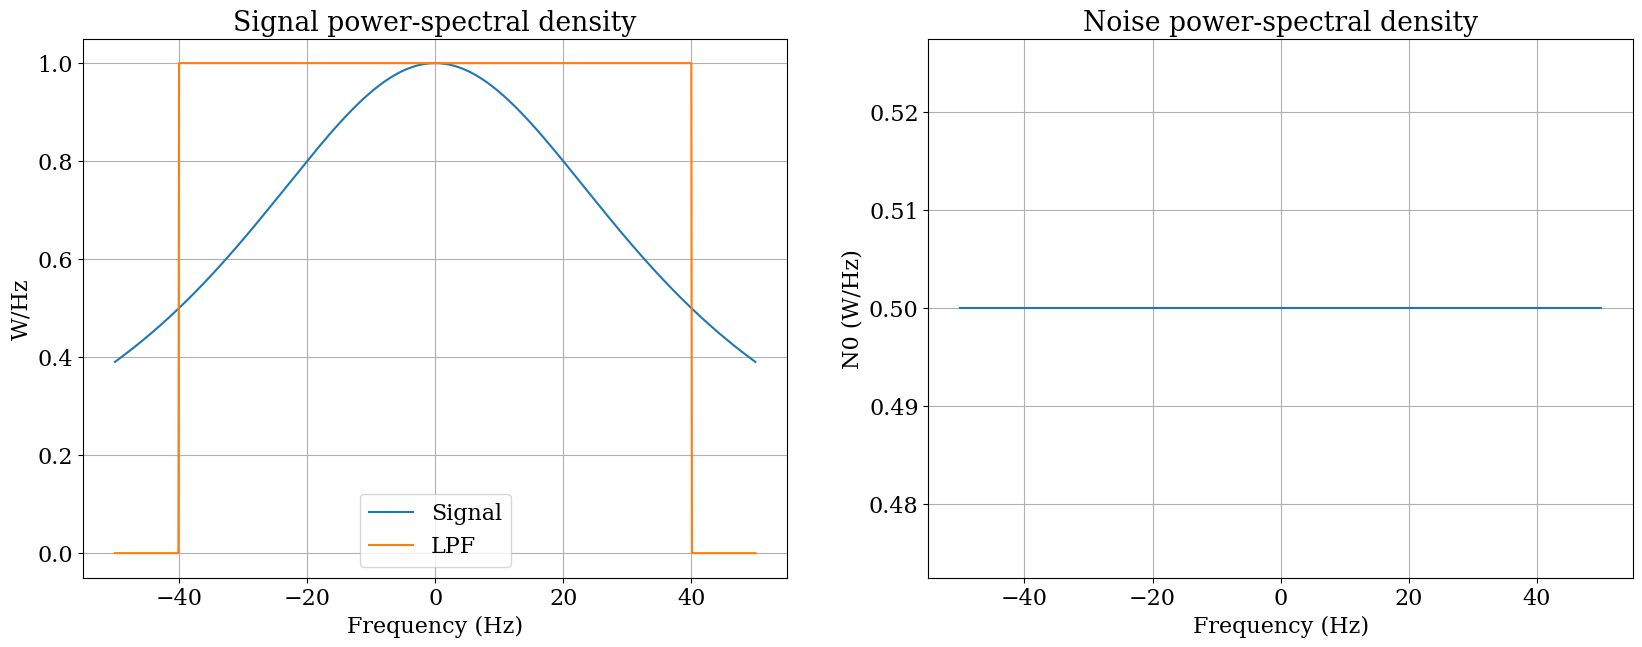

In [94]:
B = 80 # 3-dB signal band [Hz]
P0 = 1 # Power-spectral density at f=0 [W/Hz]
W = 80 # LPF bandwidth [Hz]
N0 = 1 # AWGN Power Spectral density [W/Hz]]

freqArray = np.linspace(-50,50,1000)
Ssf = P0/(1+(freqArray/(B/2))**2)
rectFunc = [int(abs(x)<=W/2) for x in freqArray]
NoiseArray = np.ones(len(freqArray))*N0/2

figure, ax = plt.subplots(1,2,figsize=(20,7))
plt.rc('font',**font)
ax[0].set_title("Signal power-spectral density")
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('W/Hz')
ax[0].plot(freqArray,Ssf, label='Signal')
ax[0].plot(freqArray,rectFunc, label='LPF')
ax[0].grid()
ax[0].legend()

ax[1].set_title("Noise power-spectral density")
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('N0 (W/Hz)')
ax[1].plot(freqArray,NoiseArray/N0)
ax[1].grid()

In [95]:
dx = (freqArray[-1]-freqArray[0])/len(freqArray) 
PowerSig = trapz(Ssf*rectFunc,dx=dx)
PowerNoise = trapz(NoiseArray*rectFunc,dx=dx)
print(f'Power Signal = {np.round(PowerSig,2)} W , Power Noise = {np.round(PowerNoise,2)} W')
print(f'SNR = {np.round(np.log10(PowerSig/PowerNoise)*10,2)} dB')

Power Signal = 62.81 W , Power Noise = 40.0 W
SNR = 1.96 dB


Text(0.5, 1.0, '$P_0$ = 1W/Hz,   $N_0$ = 1W/Hz,   W = 40Hz')

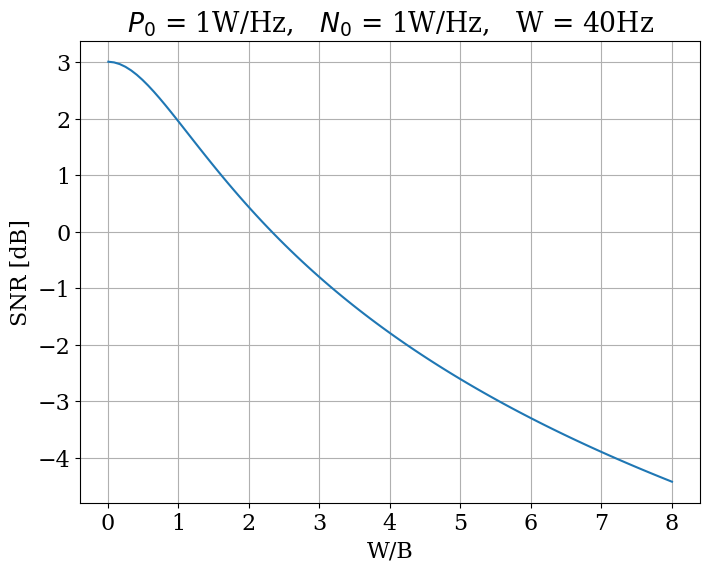

In [96]:
P0 = 1 # Power-spectral density at f=0 [W/Hz]
W = 40 # LPF bandwidth [Hz]
N0 = 1 # AWGN Power Spectral density [W/Hz]]

BArray = W/np.linspace(0.01,8,100)
SNRArray = np.zeros(len(BArray))

for i in range(len(BArray)):
    freqArray = np.linspace(-50,50,1000)
    Ssf = P0/(1+(freqArray/(BArray[i]/2))**2)
    rectFunc = [int(abs(x)<=W/2) for x in freqArray]
    NoiseArray = np.ones(len(freqArray))*N0/2

    dx = (freqArray[-1]-freqArray[0])/len(freqArray) 
    PowerSig = trapz(Ssf*rectFunc,dx=dx)
    PowerNoise = trapz(NoiseArray*rectFunc,dx=dx)

    SNRArray[i] = np.log10(PowerSig/PowerNoise)*10

plt.figure(figsize=(8,6))
plt.plot(W/BArray, SNRArray)
plt.grid()
plt.xlabel('W/B')
plt.ylabel('SNR [dB]')
plt.title(f'$P_0$ = {P0}W/Hz,   $N_0$ = {N0}W/Hz,   W = {W}Hz')

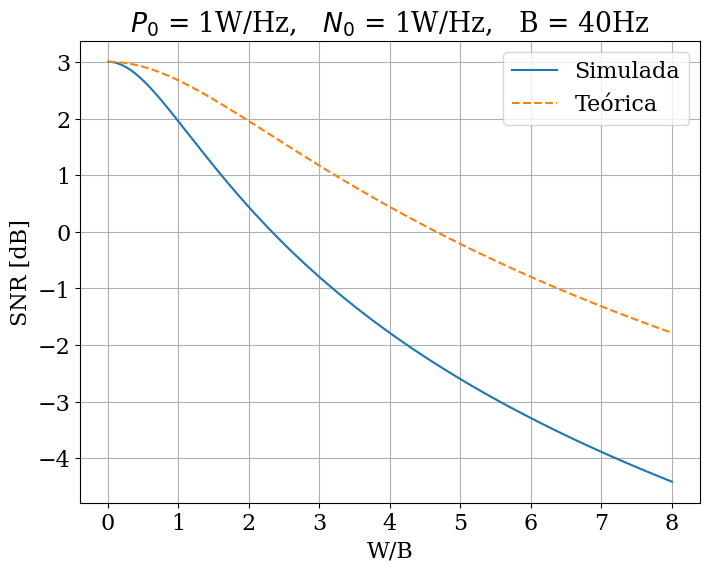

In [97]:
P0 = 1 # Power-spectral density at f=0 [W/Hz]
B = 40 # 3-dB signal band [Hz]
N0 = 1 # AWGN Power Spectral density [W/Hz]]

WArray = np.linspace(0.01,8,1000)*B
SNRArray = np.zeros(len(WArray))

for i in range(len(WArray)):
    freqArray = np.linspace(-640,640,10000)
    Ssf = P0/(1+(freqArray/(B/2))**2)
    rectFunc = [int(abs(x)<=WArray[i]/2) for x in freqArray]
    NoiseArray = np.ones(len(freqArray))*N0/2

    dx = (freqArray[-1]-freqArray[0])/len(freqArray) 
    PowerSig = trapz(Ssf*rectFunc,dx=dx)
    PowerNoise = trapz(NoiseArray*rectFunc,dx=dx)

    SNRArray[i] = np.log10(PowerSig/PowerNoise)*10

XArray = WArray/B
YArray = 4*P0*np.arctan(XArray/2)/(XArray*N0)
YArray = np.log10(YArray)*10

plt.figure(figsize=(8,6))
plt.plot(WArray/B, SNRArray,label='Simulada')
plt.plot(XArray,YArray,'--',label='Teórica')
plt.grid()
plt.xlabel('W/B')
plt.ylabel('SNR [dB]')
plt.title(f'$P_0$ = {P0}W/Hz,   $N_0$ = {N0}W/Hz,   B = {B}Hz')
plt.legend()

### Estou a analisar porque houve essa diferença